In [85]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6,6)
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams["image.origin"] = 'lower'

In [116]:
base_dir = "/storage/vbsjjlnu/VBSjjlnu_v7"
version = "v4"

datasets  = ["dnninputs_2016_v3","dnninputs_2017_v3","dnninputs_2018_v3"]

cut     = "res_sig"
if "res" in cut: 
    phasespace="resolved" 
else:
    phasespace='boosted'
    

output_dir = os.path.join(base_dir, "FullRun2_v7", cut, "samples/" + version)

samples_dirs = [os.path.join(base_dir, p) for p in datasets]

lumi = { 2016: 35.867, 2017: 41.5 , 2018: 59.74}

In [117]:
output_dir

'/storage/vbsjjlnu/VBSjjlnu_v7/FullRun2_v7/res_sig/samples/v4'

In [118]:
samples_dirs

['/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v3',
 '/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2017_v3',
 '/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2018_v3']

In [119]:
signal = "VBS"
sample_names = ["Wjets_HT", "VBS", "DY", "top", "VV",  "VVV","Vg", "VgS",  "VBF-V"]# "Fake",

samples = {}

for samples_dir in samples_dirs:
    for sample in sample_names:
        print(samples_dir, sample)
        f1 = f"{samples_dir}/dataframe_{sample}_{cut}_ele_dnn_inputs_{phasespace}.csv"
        f2 = f"{samples_dir}/dataframe_{sample}_{cut}_mu_dnn_inputs_{phasespace}.csv"
        if not os.path.exists(f1):
            break
        eledf = pd.read_csv(f1,sep=',')
        mudf = pd.read_csv(f2,sep=',')
        eledf['lep_flavour'] = 1
        mudf['lep_flavour'] = -1
        
        s =  pd.concat([eledf,mudf], ignore_index=True)
        s["sample_name"] = sample
        if "2016" in samples_dir:
            s["year"] = 2016
            s["_year"] = 1
           # s["weight"] = s["weight"] * lumi[2016] #lumi is included 
        if "2017" in samples_dir:
            s["year"] = 2017
            s["_year"] = 2
           # s["weight"] = s["weight"] * lumi[2017] #lumi is included 
        if "2018" in samples_dir:
            s["year"] = 2018 
            s["_year"] = 3
           # s["weight"] = s["weight"] * lumi[2018] #lumi is included 
            
        foundnan = s.isnull().values.any()
        print("Found nan:",foundnan)
        if foundnan:
            null_columns = s.columns[s.isnull().any()]
            print(s[s.isnull().any(axis=1)][null_columns])
            #filling missing values
            s.fillna(value={"vbs_0_qgl_res":-1,"vbs_1_qgl_res":-1,"vbs_0_qgl_boost":-1,"vbs_1_qgl_boost":-1},inplace=True)
            print(s[s.isnull().any(axis=1)][null_columns])
    
        # remove weight 0 events                    
        if sample in samples:
            samples[sample] = pd.concat([samples[sample], s[s.weight!=0.0]], ignore_index=True)
        else:
            samples[sample] = s[s.weight!=0.0]

/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v3 Wjets_HT
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v3 VBS
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v3 DY
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v3 top
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v3 VV
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v3 VVV
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v3 Vg
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v3 VgS
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v3 VBF-V
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2017_v3 Wjets_HT
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2017_v3 VBS
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2017_v3 DY
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2017_v3 top
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2017_v3 VV
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2017

In [122]:
for s, df in samples.items():
    print(f"Sample name {s:10}, nsamples: {len(df):10},   XS total: {(df.weight).sum():15}")

Sample name Wjets_HT  , nsamples:     733096,   XS total: 170342.85879163578
Sample name VBS       , nsamples:     220437,   XS total: 1444.6122770322422
Sample name DY        , nsamples:     275236,   XS total: 24594.727414046323
Sample name top       , nsamples:     222624,   XS total: 25740.262150149123
Sample name VV        , nsamples:     441737,   XS total: 9647.63421758523
Sample name VVV       , nsamples:       4008,   XS total: 84.69316593616503
Sample name Vg        , nsamples:       4454,   XS total: 2603.0360779163384
Sample name VgS       , nsamples:       3738,   XS total: 129.15700446333406
Sample name VBF-V     , nsamples:       8312,   XS total: 3197.253777907169


## Balancing

In [123]:
background = pd.concat([
                samples["top"],
                samples["DY"],
                samples["Wjets_HT"],
                samples["VV"],
                samples["VBF-V"], 
                samples["VVV"],
                samples["Vg"], 
                samples["VgS"], 
                #samples["Fake"], 
                ], ignore_index=True)

signal = samples["VBS"]

In [124]:
'''
If random sampling will be done for the signal we need to assume that the number of signal 
events will be the same of the number of background events --> This assumption will go in the background weight. 
'''
random_sampling = False

### Normalization by bkg events

In [28]:
ratio_neve_bkgsignal= len(background) / len(signal)
print(ratio_neve_bkgsignal)

tot_ev_weighted_bkg = (background.weight_ / background.weight_.mean()).sum()
print("TOT bkg weighted events", tot_ev_weighted_bkg)

rescale_factor_sig  = (tot_ev_weighted_bkg )/ signal.weight_.sum()
print("Rescale facor for signal", rescale_factor_sig)

signal["weight_norm"] = signal.weight_ * rescale_factor_sig
background["weight_norm"] = background.weight_ / background.weight_.mean()

print("Effective sig events: ", signal.weight_norm.sum())
print("Effective bkg events: ", background.weight_norm.sum())

8.61132961431954


AttributeError: 'DataFrame' object has no attribute 'weight_'

In [20]:
background.weight_.sum()

1776.771994303065

In [21]:
signal.weight_.sum()

12.259606081710476

### Normalization by signal events

In [125]:
tot_ev_weighted_sig = (signal.weight / signal.weight.mean()).sum()
print("TOT signal weighted events", tot_ev_weighted_sig)

if random_sampling:
    rescale_factor_bkg = (tot_ev_weighted_sig *ratio_neve_bkgsignal )/ background.weight.sum()
else:
    rescale_factor_bkg = (tot_ev_weighted_sig )/ background.weight.sum()
print(rescale_factor_bkg)

signal["weight_norm"] = signal.weight / signal.weight.mean()
background["weight_norm"] = background.weight * rescale_factor_bkg

print("Effective sig events: ", signal.weight_norm.sum())
print("Effective bkg events: ", background.weight_norm.sum())

TOT signal weighted events 220437.0000000001
0.9327128374636589
Effective sig events:  220437.0000000001
Effective bkg events:  220437.0


## Save signal and bkg samples

In [126]:
import os

os.makedirs(os.path.join(output_dir, "for_training"), exist_ok=True)
pickle.dump(background, open(os.path.join(output_dir, "for_training/background_balanced.pkl"), "wb"))
pickle.dump(signal, open(os.path.join(output_dir, "for_training/signal_balanced.pkl"), "wb"))

In [127]:
signal.columns

Index(['weight', 'A_ww', 'Asym_vbs', 'Asym_vjet', 'Centr_vbs', 'Centr_ww',
       'Lep_proj', 'Lep_projw', 'Lepton_eta', 'Lepton_phi', 'Lepton_pt',
       'Mtw_lep', 'Mw_lep', 'Mww', 'PuppiMET_phi', 'PuppiMET_pt', 'R_mw',
       'R_ww', 'Rvjets_0', 'Rvjets_1', 'Zlep', 'Zvjets_0', 'Zvjets_1',
       'deltaR_lep_nu', 'deltaR_lep_vbs', 'deltaR_lep_vjet', 'deltaR_vbs',
       'deltaR_vjet', 'deltaeta_lep_nu', 'deltaeta_vbs', 'deltaeta_vjet',
       'deltaphi_lep_nu', 'deltaphi_vbs', 'deltaphi_vjet', 'four_tag_jets_HT',
       'four_tag_jets_lepton_HT', 'four_tag_jets_pt', 'mjj_vbs', 'mjj_vjet',
       'nJets30', 'nvtxGood', 'v_jets_HT', 'vbs_0_E', 'vbs_0_eta', 'vbs_0_phi',
       'vbs_0_pt', 'vbs_0_qgl_res', 'vbs_1_E', 'vbs_1_eta', 'vbs_1_phi',
       'vbs_1_pt', 'vbs_1_qgl_res', 'vbs_jets_HT', 'vbs_jets_pt', 'vjet_0_E',
       'vjet_0_eta', 'vjet_0_phi', 'vjet_0_pt', 'vjet_0_qgl_res', 'vjet_1_E',
       'vjet_1_eta', 'vjet_1_phi', 'vjet_1_pt', 'vjet_1_qgl_res', 'w_had_pt',
       'w_lep_p

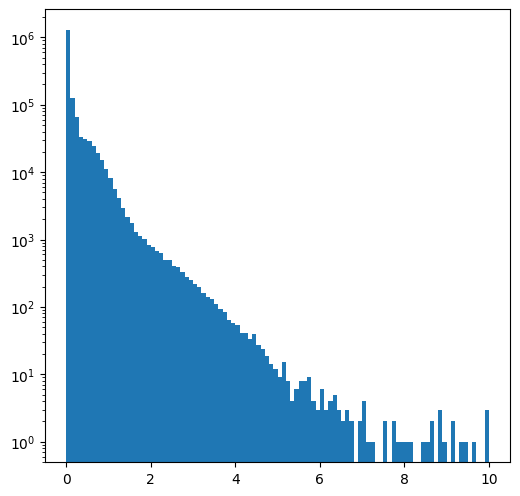

In [128]:
plt.hist(background["weight_norm"], bins=100, range=(0, 10))
plt.yscale("log")

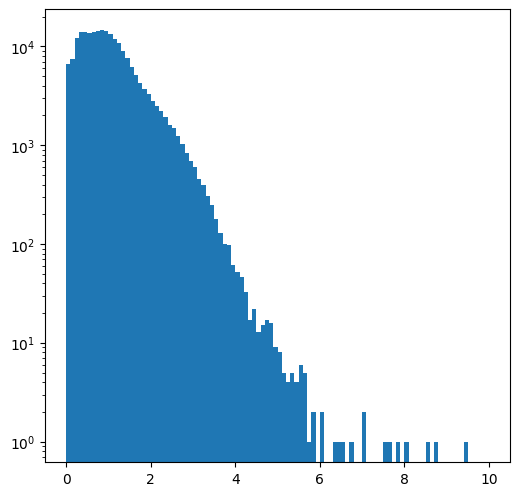

In [129]:
plt.hist(signal["weight_norm"], bins=100, range=(0, 10))
plt.yscale("log")

The total number of events will be manually balanced

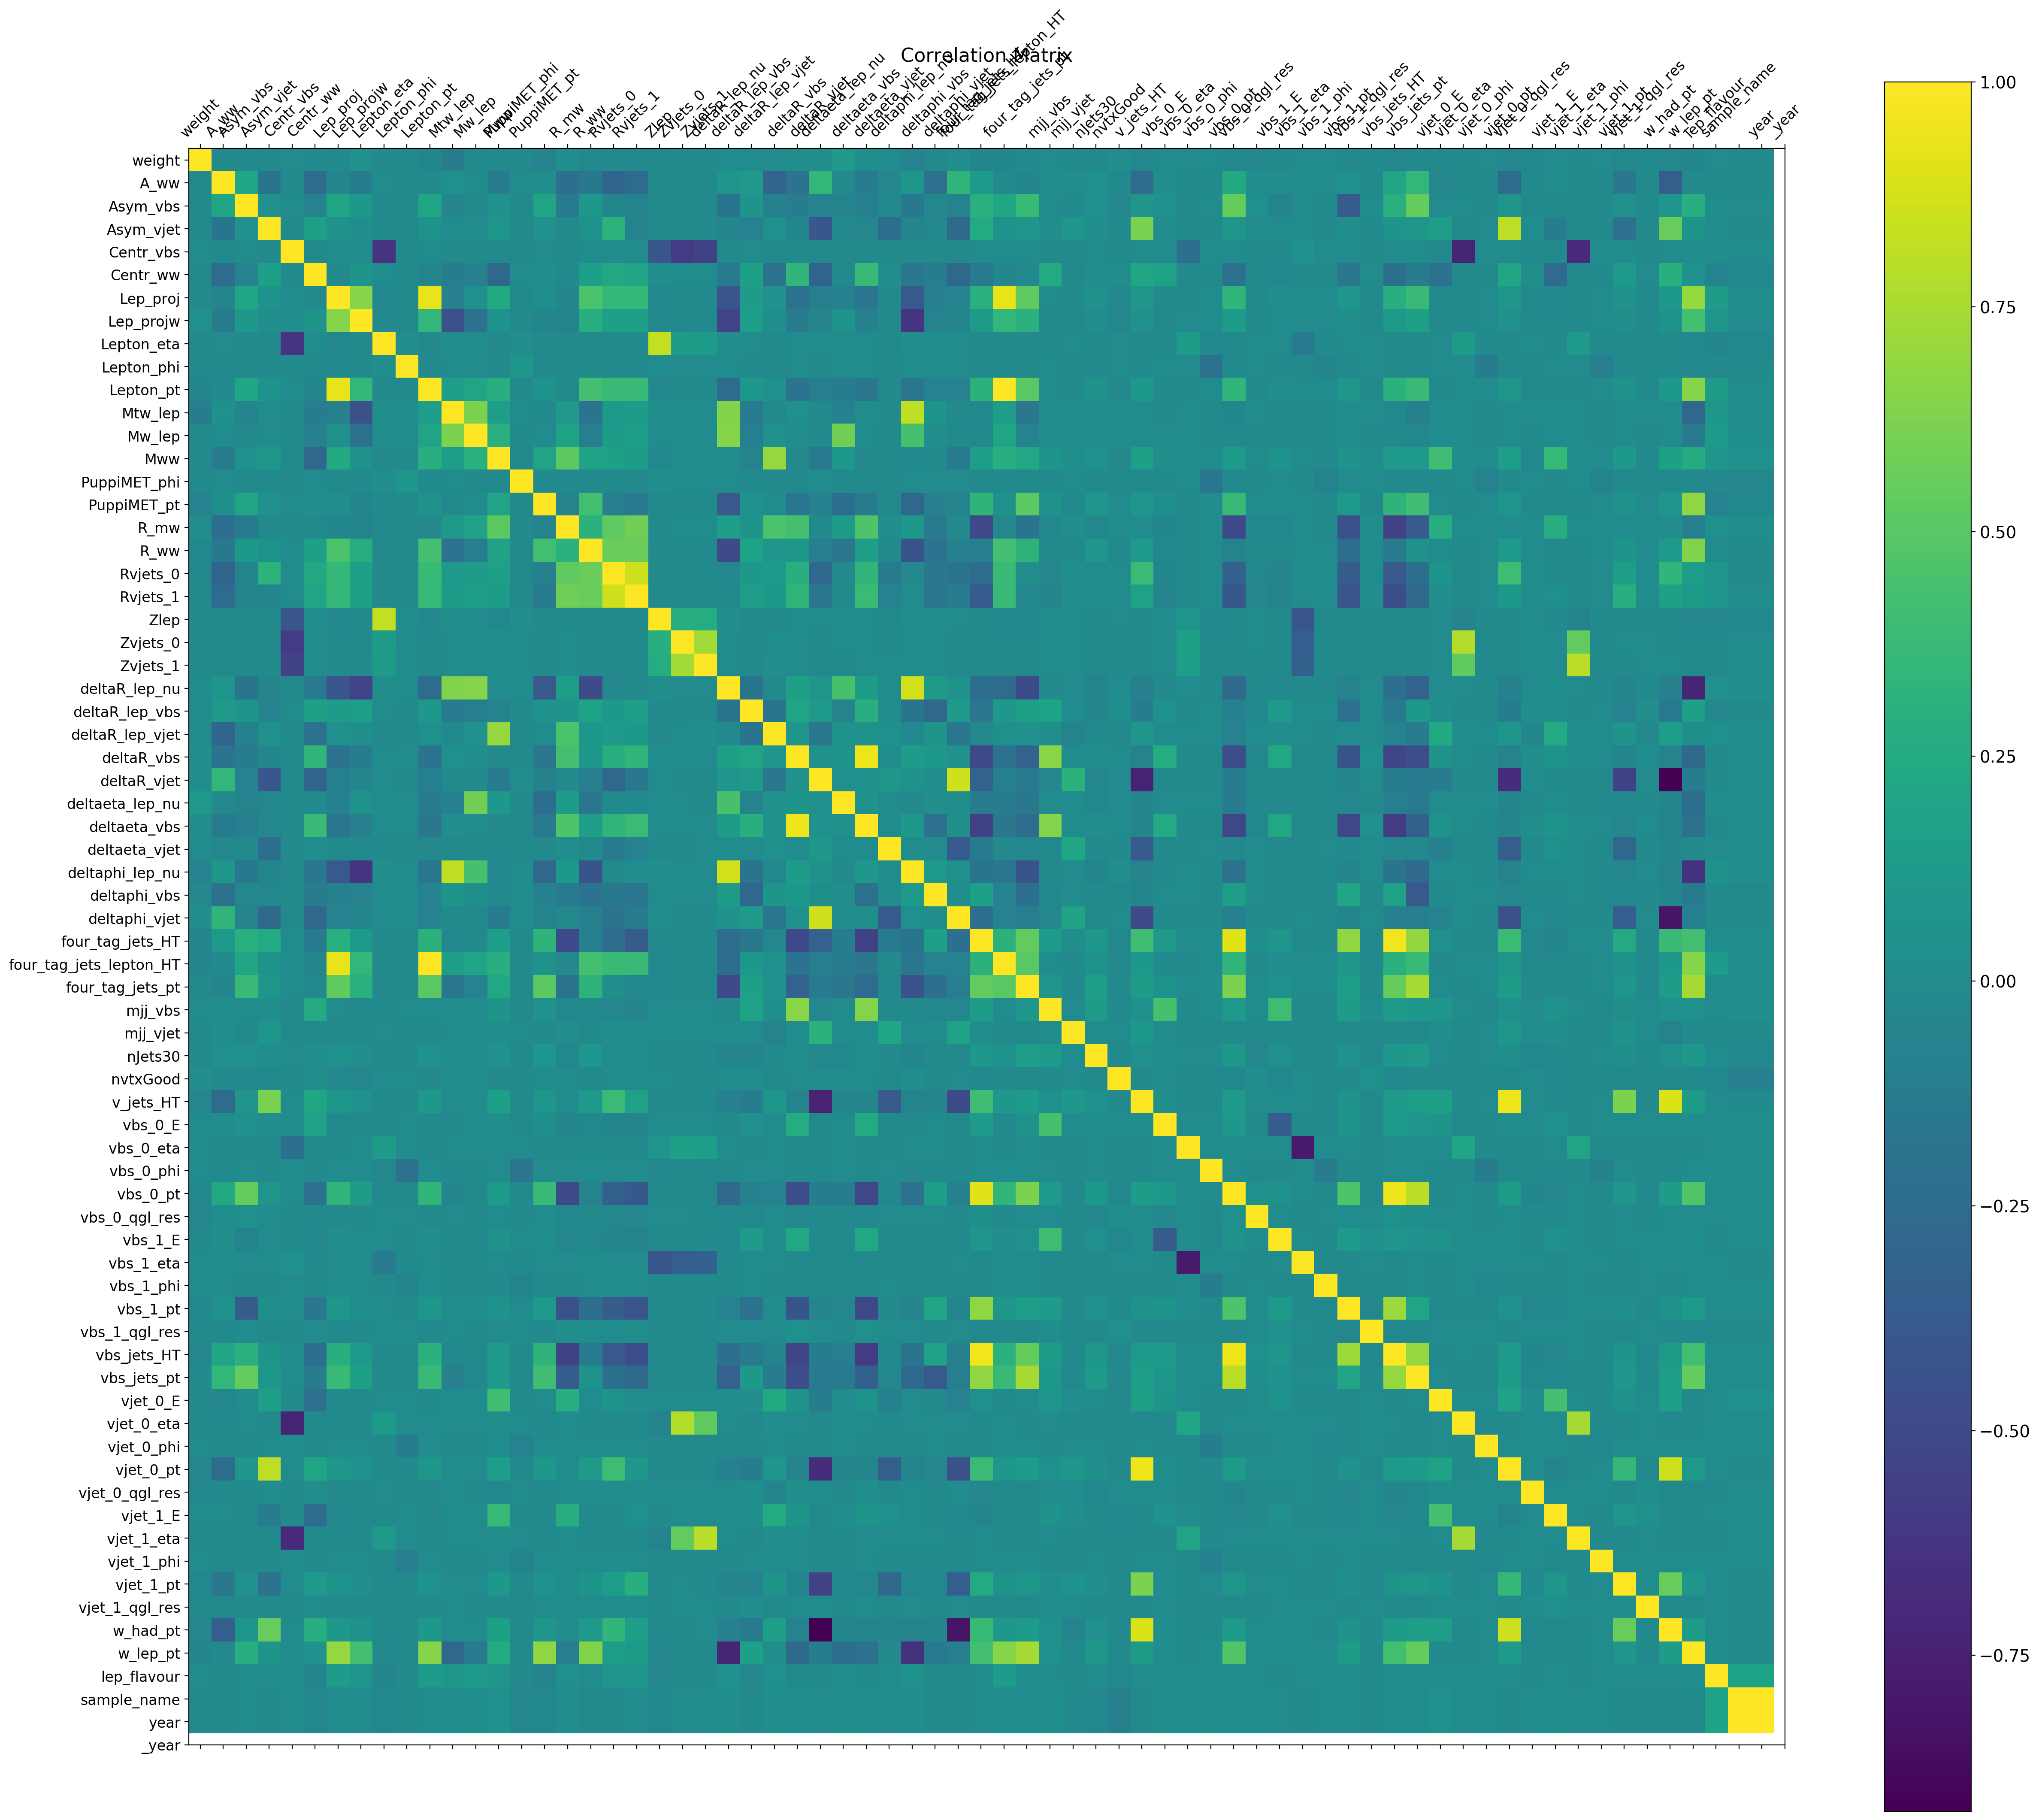

In [73]:
f = plt.figure(figsize=(30, 26), dpi=200)
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);